In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


# Load data

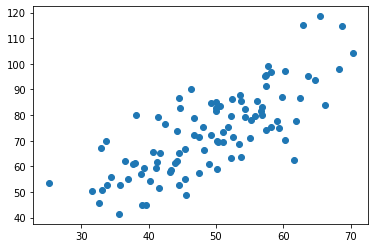

In [2]:
data = np.genfromtxt('data.csv', delimiter=',', skip_header=1)
X = data[:, 0]
Y = data[:, 1]
plt.scatter(X, Y, label="Points")

X = np.array(X)
Y = np.array(Y)

# Build model

In [3]:
model = Sequential()
dense = Dense(1,input_shape=(1,))
model.add(dense)
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mae","mse"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# Fit model

In [4]:
model.fit(X,Y,epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 750us/step - loss: 16020.5947 - mae: 124.1550 - mse: 16020.5947
Epoch 2/1000
4/4 [==============================] - 0s 1000us/step - loss: 15969.5225 - mae: 123.9561 - mse: 15969.5225
Epoch 3/1000
4/4 [==============================] - 0s 749us/step - loss: 15919.6377 - mae: 123.7596 - mse: 15919.6377
Epoch 4/1000
4/4 [==============================] - 0s 742us/step - loss: 15868.4453 - mae: 123.5616 - mse: 15868.4453
Epoch 5/1000
4/4 [==============================] - 0s 999us/step - loss: 15818.5400 - mae: 123.3653 - mse: 15818.5400
Epoch 6/1000
4/4 [==============================] - 0s 749us/step - loss: 15768.0547 - mae: 123.1674 - mse: 15768.0547
Epoch 7/1000
4/4 [==============================] - 0s 1ms/step - loss: 15718.3232 - mae: 122.9706 - mse: 15718.3232
Epoch 8/1000
4/4 [==============================] - 0s 1000us/step - loss: 15668.1729 - mae: 122.7740 - mse: 15668.1729
Epoch 9/1000
4/4 [==============================

# Check errors

In [5]:
Y_pred = model.predict(X)[:,0]
E_pred = ((Y-Y_pred)**2).mean()
#read weights from the network 
pa, pb = model.get_weights()
pa = pa[0,0]
pb = pb[0]
print("Predicted coeficients: a={:.3f} b={:.3f}, error={:.5f}".format(pa,pb,E_pred))

Predicted coeficients: a=1.337 b=2.403, error=133.39812


# Calculation of coefficients

In [6]:
avg_X = np.average(X)
avg_Y = np.average(Y)
ca = np.sum((X-avg_X)*(Y-avg_Y)) / np.sum((X-avg_X)*(X-avg_X))
cb = avg_Y - ca*avg_X
Y_calc = ca*X+cb
E_calc = ((Y-Y_calc)**2).mean()
print("Calculated coeficients: a={:.3f} b={:.3f}, error={:.5f}".format(ca,cb,E_calc))

Calculated coeficients: a=1.287 b=9.909, error=107.47044


# Plot

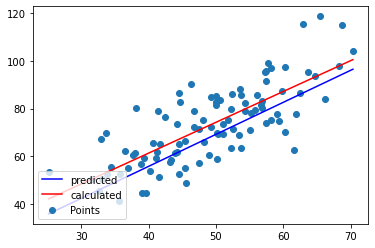

In [7]:
plt.scatter(X, Y, label="Points")
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color=(0,0,1), label="predicted")  # predicted line
plt.plot([min(X), max(X)], [min(Y_calc), max(Y_calc)], color=(1,0,0), label="calculated")  # calculated line
plt.legend(loc='lower left')    
plt.show()